# 3-2. Color

matplotlib에서 다양한 [color api](https://matplotlib.org/stable/api/colors_api.html)를 제공하고 있으니 참고하길 바랍니다.

## 0. 색상 더 이해하기

색을 이해하기 위해서는 rgb보다 hsl을 이해하는 것이 중요합니다.

- **Hue(색조)** : 빨강, 파랑, 초록 등 색상으로 생각하는 부분
    - 빨강에서 보라색까지 있는 스펙트럼에서 0-360으로 표현
- **Saturate(채도)** : 무채색과의 차이 
    - 선명도라고 볼 수 있음 (선명하다와 탁하다.)
    - 채도가 낮다 : 색이 탁하다, 회색과 가깝다.
    - 채도가 높다 : 색이 선명하다, 쨍하다.
- **Lightness(광도)** : 색상의 밝기

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/HSL_color_solid_sphere_spherical.png" width=250>



- [Github Topic Color-palette](https://github.com/topics/color-palette)
- [karthik/wesanderson](https://github.com/karthik/wesanderson)
- [Top R Color Palettes to Know for Great Data Visualization](https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/)

등 다양한 색상을 살펴보며 아래의 분류들을 잘 활용하면 좋습니다.

그리고 추후에는 다음과 같은 도구로 색상을 선택할 수도 있습니다.

- [Adobe Color](https://color.adobe.com/create/color-wheel)

## 1. 범주형 색상 (Qualitative)

이미 앞서서 많이 사용했던 범주별 분류입니다. 

Built-in Colormap을 사용하여 다양한 표현방법을 살펴보도록 하겠습니,

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data

/content/drive/MyDrive/boostcamp/04_U-stage/000_Data Viz/00_data


In [4]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1-1. 색 살펴보기

matplotlib의 colormap을 다루는 것은 살짝 복잡합니다. 강의에서는 일부 테크닉을 소개합니다.

In [5]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))
gton

{'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}

In [6]:
# Group에 따라 색 1, 2, 3, 4, 5
student['color'] = student['race/ethnicity'].map(gton)
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,color
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,2


In [7]:
# color list to color map
print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


범주형 색상은 채도와 광도는 거의 일정하고, 색상의 변화만으로 차이를 주는 것이 특징입니다.

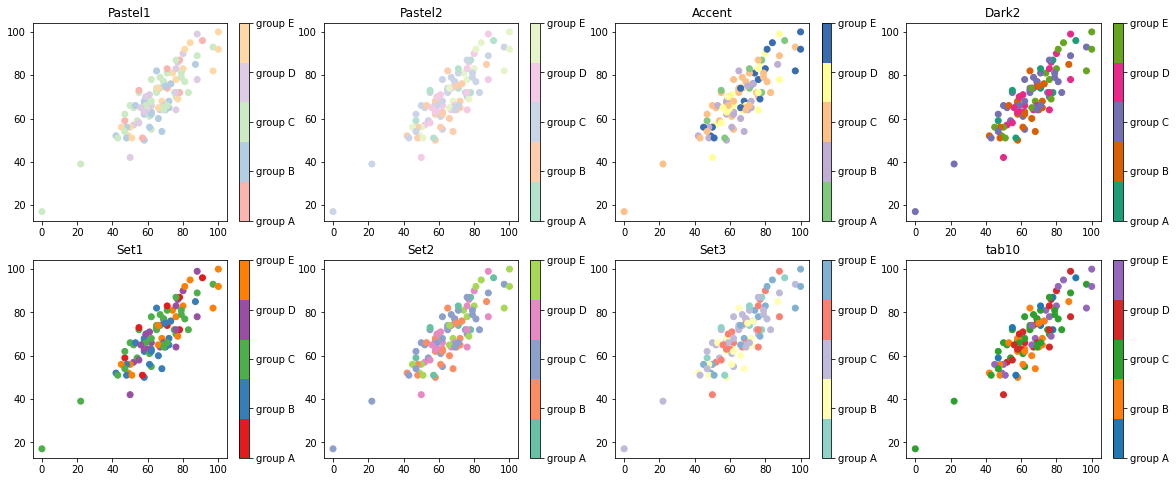

In [8]:
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5])
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5)) # colorbar 추가 (하나의 subplot)
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

이산적인 색을 사용한 막대그래프와 라인그래프는 이미 앞서 살펴봤습니다. 추후 이산적인 색상은 seaborn에서 적용하며 살펴보겠습니다.

일반적으로 **tab10과 Set2**가 가장 많이 사용되고 더 많은 색은 위에서 언급한 R colormap을 사용하면 좋습니다.

## 2. 연속형 색상

- Heatmap, Contour Plot
- 지리지도 데이터, 계층형 데이터에도 적합

### 2-1. 색 살펴보기

**색조는 유지**하되 **색의 밝기를 조정**하여 연속적인 표현을 나타냅니다.

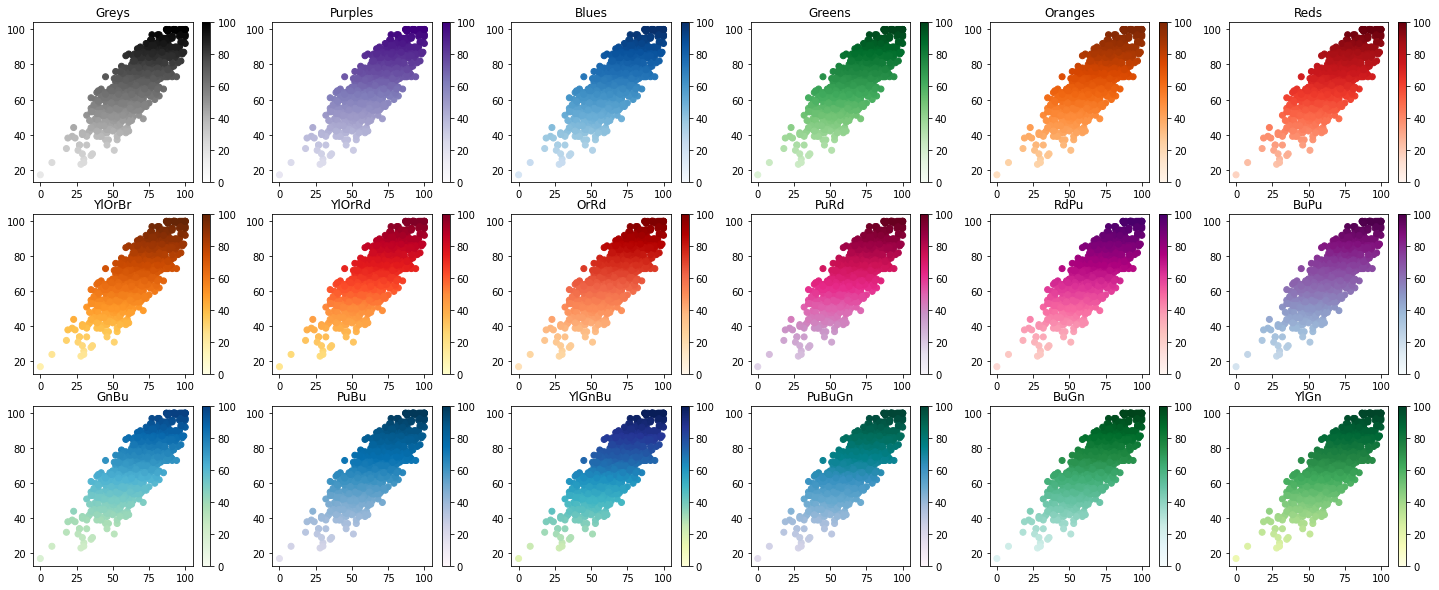

In [9]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], 
                            cmap=cm,
                            vmin=0, vmax=100 # 밝기의 최소, 최대값 지정
                    
                     )
    fig.colorbar(pcm, ax=axes[idx])
    axes[idx].set_title(cm)
    
plt.show()

### 2-2. imshow

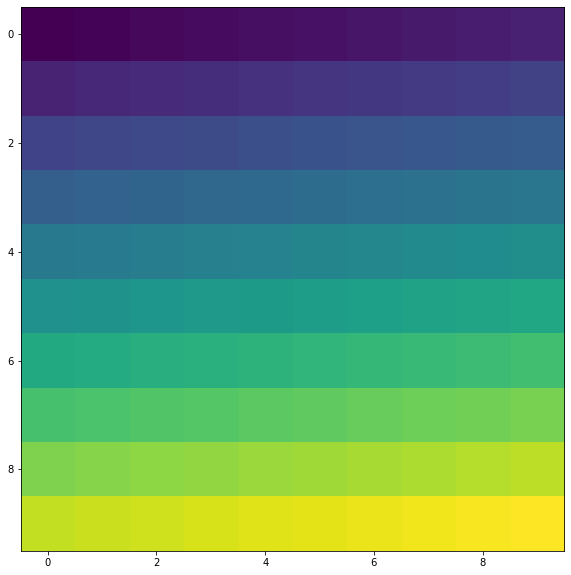

In [10]:
im = np.arange(100).reshape(10, 10) # 0 에 가까울수록 어둡고, 숫자가 클수록 밝아진다.
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
plt.show()

이를 활용하면 깃헙 잔디밭도 만들 수 있습니다.

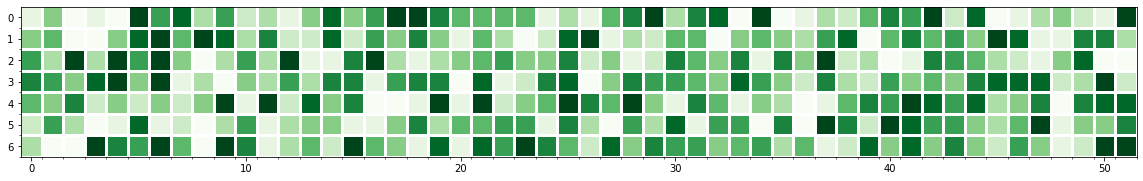

In [17]:
im =  np.random.randint(10, size=(7, 52)) # 0~9 숫자를 7x52 크기의 배열로 생성
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(im, cmap='Greens')
ax.set_yticks(np.arange(7)+0.5, minor=True)
ax.set_xticks(np.arange(52)+0.5, minor=True)
ax.grid(which='minor', color="w", linestyle='-', linewidth=3)
plt.show()

## 3. 발산형 색상

- 어디를 중심으로 삼을 것인가
- 상관관계 등 
- Geospatial

### 3-1. 색 살펴보기

reading score's mean: 69.16900
offset: [[0.07228672 0.14457344 0.21686015 0.28914687 0.36143359 0.43372031
  0.5134767  0.67565113 0.83782557 1.        ]]


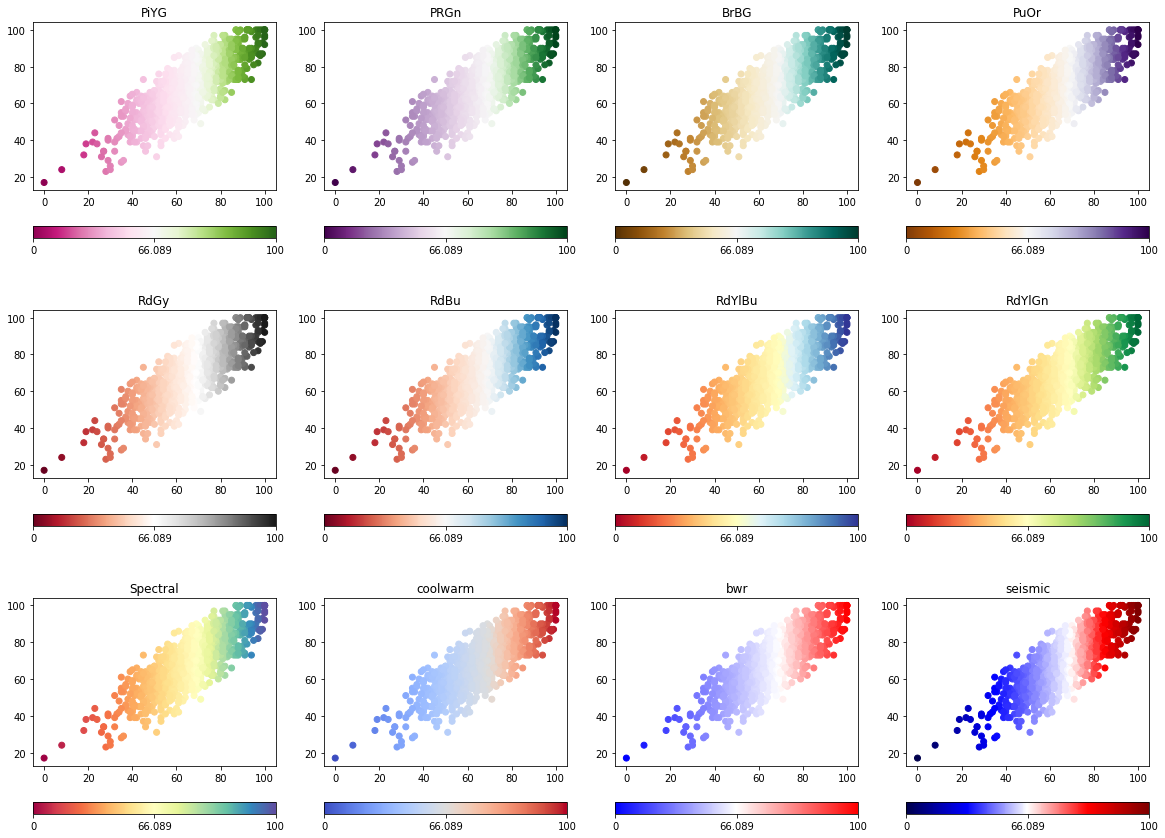

In [19]:
from matplotlib.colors import TwoSlopeNorm # 특정 지점을 기준으로 양쪽을 각각 정규화

diverging_cm_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten() # 반복문을 효율적으로 사용하기 위해 flatten 사용 (axes 의 type: ndarray)

offset = TwoSlopeNorm(vmin=0, vcenter=student['reading score'].mean(), vmax=100) # 읽기 성적의 평균을 중간 지점으로 설정

print(f"reading score's mean: {student['reading score'].mean():.5f}")
print(f"offset: {offset([range(10, 110, 10)])}") # 70 일 때 offset 이 0.5

student_sub = student.sample(100)

for idx, cm in enumerate(diverging_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=offset(student['math score']), 
                            cmap=cm,
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], 
                        ticks=[0, 0.5, 1], 
                        orientation='horizontal'
                       )
    cbar.ax.set_xticklabels([0, student['math score'].mean(), 100])
    axes[idx].set_title(cm)
    
plt.show()

## 4. 색상 대비 더 이해하기

### 4-0. 특정 부분 강조를 위한 시각화

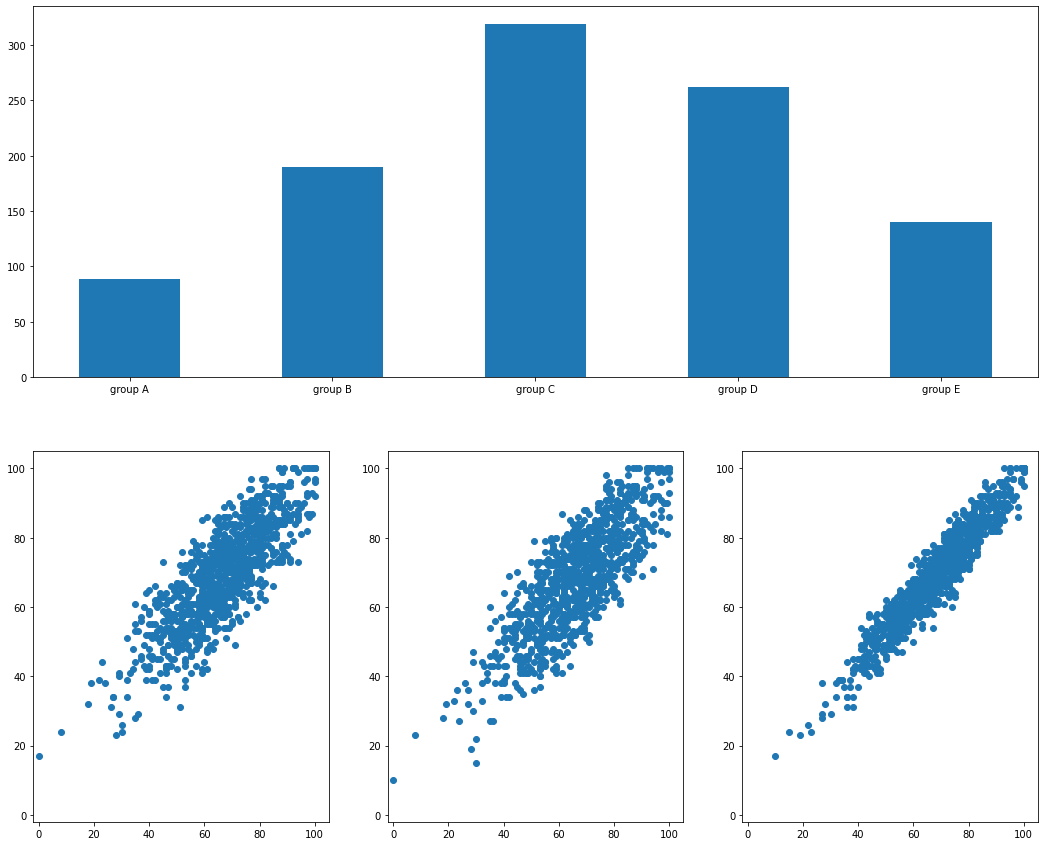

In [20]:
fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'])
ax_s2.scatter(student['math score'], student['writing score'])
ax_s3.scatter(student['writing score'], student['reading score'])

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 4-1. 명도 대비

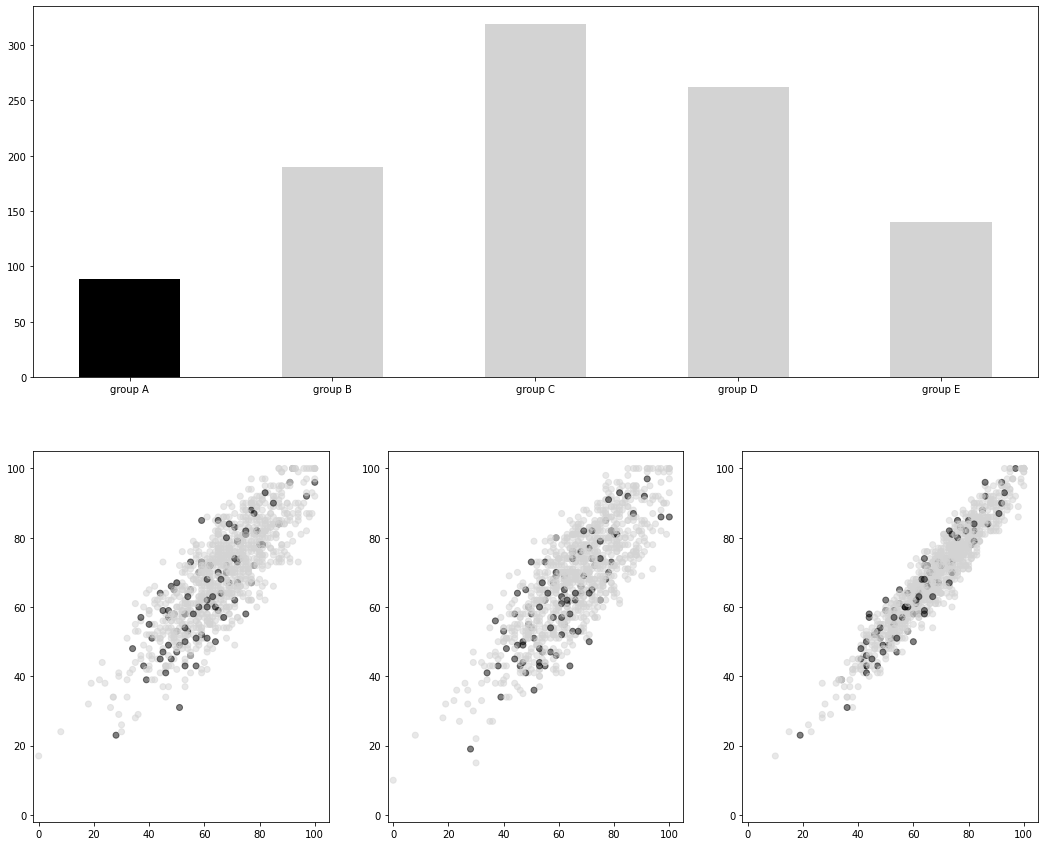

In [21]:
a_color, nota_color = 'black', 'lightgray' # 

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.5)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.5)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.5)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 4-2. 채도 대비

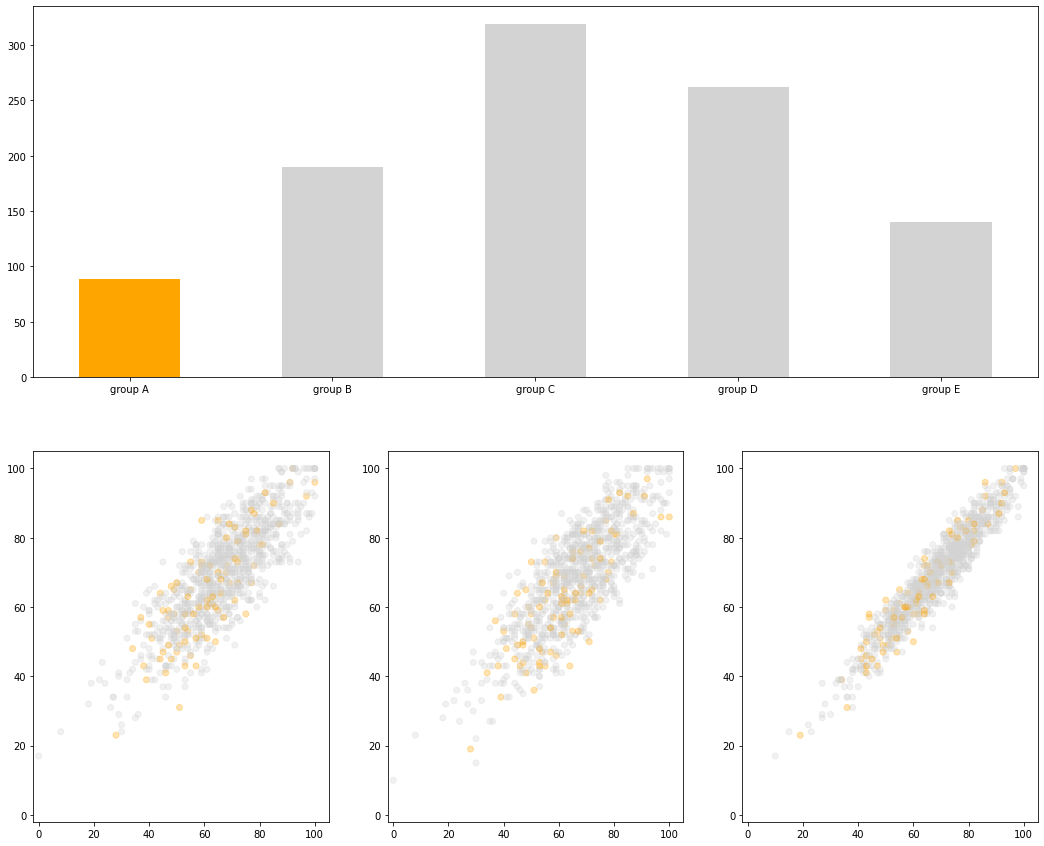

In [22]:
a_color, nota_color = 'orange', 'lightgray' # 

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 4-2. 보색 대비

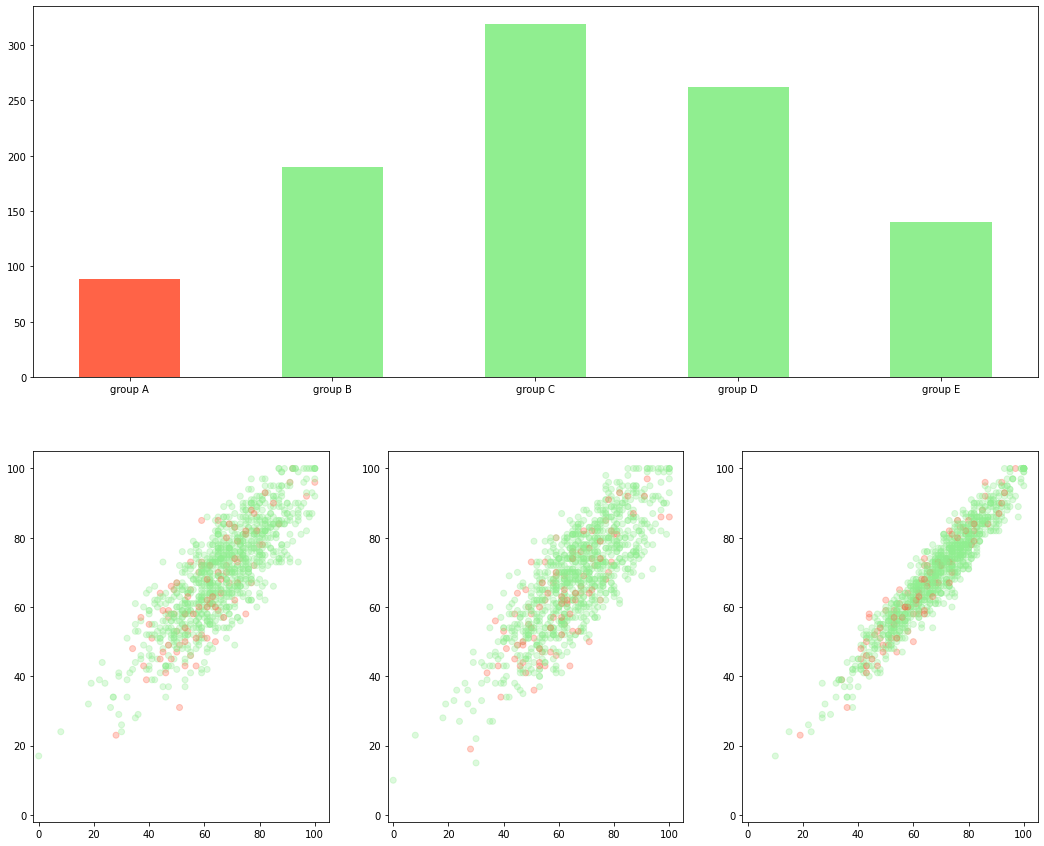

In [23]:
a_color, nota_color = 'tomato', 'lightgreen' #

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()